In [1]:

import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
current_directory = os.path.dirname(os.getcwd())
train_path = os.path.join(current_directory, 'csv')

train_df = pd.read_csv(os.path.join(train_path, 'train.csv'))
test_df = pd.read_csv(os.path.join(train_path, 'test.csv'))
gender_submission_df = pd.read_csv(os.path.join(train_path, 'gender_submission.csv'))


train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:


print("Исходные данные:")
display(train_df.head())

# Удаляем ненужные столбцы
train_df_cleaned = train_df.drop(columns=['Cabin', 'Name', 'Ticket', 'Survived'])
test_df_cleaned = test_df.drop(columns=['Cabin', 'Name', 'Ticket'])

# Проверка после удаления столбцов
print("\nПосле удаления столбцов 'Cabin', 'Name', 'Ticket' и 'Survived':")
display(train_df_cleaned.head())

# male -> 1, female -> 0
train_df_cleaned['Sex'] = train_df_cleaned['Sex'].map({'male': 1, 'female': 0})
test_df_cleaned['Sex'] = test_df_cleaned['Sex'].map({'male': 1, 'female': 0})


print("\nПосле преобразования 'Sex' в числовые значения (male -> 1, female -> 0):")
display(train_df_cleaned.head())

# Заполняем пропущенные значения в столбцах "Age" и "Fare" медианой
train_df_cleaned['Age'] = train_df_cleaned['Age'].fillna(train_df_cleaned['Age'].median())
train_df_cleaned['Fare'] = train_df_cleaned['Fare'].fillna(train_df_cleaned['Fare'].median())
test_df_cleaned['Age'] = test_df_cleaned['Age'].fillna(test_df_cleaned['Age'].median())
test_df_cleaned['Fare'] = test_df_cleaned['Fare'].fillna(test_df_cleaned['Fare'].median())

# Преобразуем "Embarked" в dummy-переменные (однократное кодирование)
train_df_cleaned = pd.get_dummies(train_df_cleaned, columns=['Embarked'], dummy_na=False)
test_df_cleaned = pd.get_dummies(test_df_cleaned, columns=['Embarked'], dummy_na=False)

# Преобразуем dummy-переменные в целочисленные значения
train_df_cleaned = train_df_cleaned.astype(int)
test_df_cleaned = test_df_cleaned.astype(int)


print("\nПосле преобразования 'Embarked' в dummy-переменные (0 и 1):")
display(train_df_cleaned.head())

# Проверка на наличие пропусков в каждом столбце
print("\nКоличество пропусков в каждом столбце после очистки:")
display(train_df_cleaned.isna().sum())


Исходные данные:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



После удаления столбцов 'Cabin', 'Name', 'Ticket' и 'Survived':


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S



После преобразования 'Sex' в числовые значения (male -> 1, female -> 0):


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,S
1,2,1,0,38.0,1,0,71.2833,C
2,3,3,0,26.0,0,0,7.9250,S
3,4,1,0,35.0,1,0,53.1000,S
4,5,3,1,35.0,0,0,8.0500,S



После преобразования 'Embarked' в dummy-переменные (0 и 1):


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,22,1,0,7,0,0,1
1,2,1,0,38,1,0,71,1,0,0
2,3,3,0,26,0,0,7,0,0,1
3,4,1,0,35,1,0,53,0,0,1
4,5,3,1,35,0,0,8,0,0,1



Количество пропусков в каждом столбце после очистки:


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [7]:

X = train_df_cleaned
y = train_df['Survived']
X_test_final = test_df_cleaned

# Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных. К одному масштабу
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_final_scaled = scaler.transform(X_test_final)

In [8]:
# Порог
n = 1000
lin = np.linspace(0, 1, n)

Linear Regression средний пороговый accuracy: 0.7821229050279329
Lasso Regression средний пороговый accuracy: 0.7821229050279329
Logistic Regression средний пороговый accuracy: 0.8044692737430168
Linear Regression средний пороговый accuracy на финальных данных: 0.9665071770334929
Lasso Regression средний пороговый accuracy на финальных данных: 0.992822966507177
Logistic Regression средний пороговый accuracy на финальных данных: 0.9282296650717703


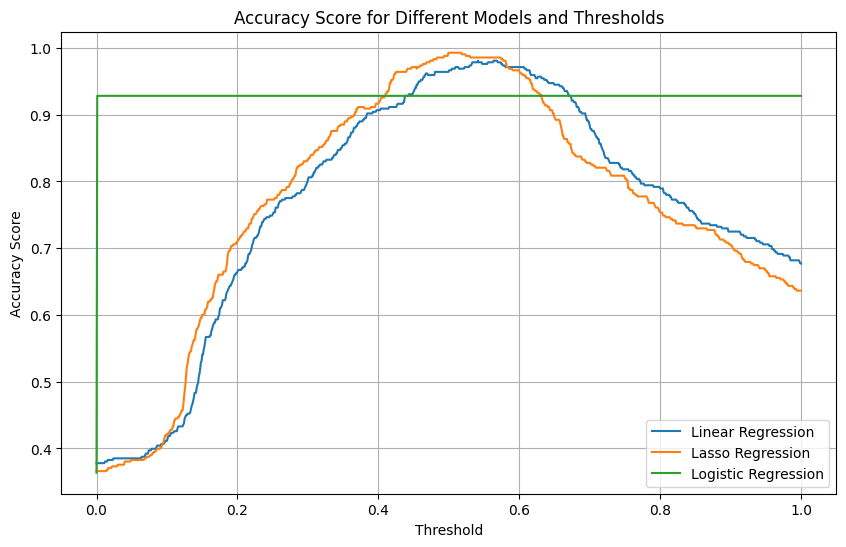

In [9]:
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.metrics import r2_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt


# Определение моделей
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.01),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}



# Обучение моделей и оценка точности
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Логистическая регрессия
    if model_name == "Logistic Regression":
        score_curve = [accuracy_score((y_pred >= threshold).astype(int), y_test) for threshold in lin]
        accuracy = max(score_curve)
        r2 = None
        print(f"{model_name} средний пороговый accuracy:", score_curve[len(score_curve) // 2])
    else:
        # Линейная и Лассо.
        score_curve = [accuracy_score((y_pred >= threshold).astype(int), y_test) for threshold in lin]
        accuracy = max(score_curve)
        r2 = r2_score(y_test, y_pred)
        print(f"{model_name} средний пороговый accuracy:", score_curve[len(score_curve) // 2])
    


# Визуализация точности для разных порогов
plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    y_pred_final = model.predict(X_test_final_scaled)
    score_curve = [accuracy_score((y_pred_final >= threshold).astype(int), gender_submission_df['Survived']) for threshold in lin]
    
    plt.plot(lin, score_curve, label=model_name)
    
    # Печать среднего порогового accuracy для финальных данных
    print(f"{model_name} средний пороговый accuracy на финальных данных:", score_curve[len(score_curve) // 2])

plt.xlabel("Threshold")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score for Different Models and Thresholds")
plt.legend()
plt.grid()
plt.show()
